In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('covid.csv')
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)
df['dateRep'] = pd.to_datetime(df['dateRep'])
#df.rename(columns={'countriesAndTerritories': 'Country'}, inplace=True)
#df['dateRep'] = df['dateRep'].dt.date

In [3]:
df['dateRep'].max()

Timestamp('2020-12-10 00:00:00')

In [4]:
df.loc[3,'dateRep'].day_name()

'Thursday'

In [5]:
df['DayofWeek'] = df['dateRep'].dt.day_name()

In [6]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,DayofWeek
0,2020-01-11,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.0,Asia,3.575019,Saturday
1,2020-10-31,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.0,Asia,3.553989,Saturday
2,2020-10-30,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.0,Asia,3.264833,Friday
3,2020-10-29,29,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.941505,Thursday
4,2020-10-28,28,10,2020,113,7,Afghanistan,AF,AFG,38041757.0,Asia,3.025623,Wednesday


In [7]:
#df.set_index('dateRep', inplace=True) 

In [8]:
#df['dateRep'].min()

In [9]:
#df['dateRep'].max()

In [10]:
#df['cases'].resample('W').max()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [11]:
df['deaths'].nlargest(1)

50549    4928
Name: deaths, dtype: int64

In [12]:
df['dateRep'].max() - df['dateRep'].min()

Timedelta('345 days 00:00:00')

In [13]:
df.nlargest(3, 'cases')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,DayofWeek
50351,2020-10-31,31,10,2020,101273,1040,United_States_of_America,US,USA,3.290649e+08,America,303.066644,Saturday
22877,2020-09-17,17,9,2020,97894,1132,India,IN,IND,1.366418e+09,Asia,92.566640,Thursday
22882,2020-12-09,12,9,2020,97570,1201,India,IN,IND,1.366418e+09,Asia,87.529015,Wednesday


In [14]:
country_grp = df.groupby(['countriesAndTerritories']).sum()

In [15]:
country_grp['cases'].nlargest(5)

countriesAndTerritories
United_States_of_America    9126361
India                       8184082
Brazil                      5535605
Russia                      1618116
France                      1364625
Name: cases, dtype: int64

In [16]:
country_grp = df.groupby(['countriesAndTerritories'])
cases = country_grp['cases'].nlargest(1).nlargest(5)
deaths = country_grp['deaths'].nlargest(1)
print(f'The 5 countries of the most daily cases in the World:\n{cases.to_string(header=False)}')


The 5 countries of the most daily cases in the World:
United_States_of_America  50351    101273
India                     22877     97894
Brazil                    6924      69074
Spain                     44980     52188
France                    17403     52010


In [17]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,DayofWeek
0,2020-01-11,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.0,Asia,3.575019,Saturday
1,2020-10-31,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.0,Asia,3.553989,Saturday
2,2020-10-30,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.0,Asia,3.264833,Friday
3,2020-10-29,29,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.941505,Thursday
4,2020-10-28,28,10,2020,113,7,Afghanistan,AF,AFG,38041757.0,Asia,3.025623,Wednesday
5,2020-10-27,27,10,2020,199,8,Afghanistan,AF,AFG,38041757.0,Asia,2.902074,Tuesday
6,2020-10-26,26,10,2020,65,3,Afghanistan,AF,AFG,38041757.0,Asia,2.718066,Monday
7,2020-10-25,25,10,2020,81,4,Afghanistan,AF,AFG,38041757.0,Asia,2.799555,Sunday
8,2020-10-24,24,10,2020,61,2,Afghanistan,AF,AFG,38041757.0,Asia,2.586631,Saturday
9,2020-10-23,23,10,2020,116,4,Afghanistan,AF,AFG,38041757.0,Asia,2.452568,Friday


In [18]:
df1 = df.set_index('dateRep', inplace=True)

In [19]:
print(df1)

None


In [20]:
country_group = df.groupby(['countriesAndTerritories']).sum()
country_group['death/cases'] = (country_group['deaths'] / country_group['cases']) * 100
ratio = country_group['death/cases'].nlargest(5)

In [21]:
country_group.head()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death/cases
countriesAndTerritories,,,,,,,,
Afghanistan,4755,1675,599939,41501,1536,1.129840e+10,1503.090407,3.701116
Albania,3840,1580,480760,20875,509,6.812576e+08,9271.607625,2.438323
Algeria,4799,1690,610039,57942,1964,1.300202e+10,1823.410716,3.389596
Andorra,3773,1565,470660,4756,75,1.774924e+07,74397.784108,1.576955
Angola,3645,1541,454500,10558,279,7.160692e+09,394.264953,2.642546


In [22]:
ratio

countriesAndTerritories
Yemen          29.069767
Mexico          9.919651
Montserrat      7.692308
Ecuador         7.533057
Isle_of_Man     6.798867
Name: death/cases, dtype: float64

In [23]:
python_df = pd.concat([cases, deaths], axis = 'columns', sort=False)

In [24]:
result = df.groupby(by=['countriesAndTerritories']).sum() 

In [25]:
result

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
countriesAndTerritories,,,,,,,
Afghanistan,4755,1675,599939,41501,1536,1.129840e+10,1503.090407
Albania,3840,1580,480760,20875,509,6.812576e+08,9271.607625
Algeria,4799,1690,610039,57942,1964,1.300202e+10,1823.410716
Andorra,3773,1565,470660,4756,75,1.774924e+07,74397.784108
Angola,3645,1541,454500,10558,279,7.160692e+09,394.264953
Anguilla,3525,1526,444400,3,0,3.271840e+06,67.240452
Antigua_and_Barbuda,3681,1547,458540,128,3,2.204510e+07,1718.581064
Argentina,3843,1586,484800,1166911,31002,1.074736e+10,33853.306142
Armenia,4775,1678,601959,92254,1363,8.814029e+08,36641.807496


In [26]:
country_grp = df.groupby(['countriesAndTerritories']).sum()


In [27]:
country_grp.loc['Poland']['cases']

362731.0

In [28]:
name = (df['countriesAndTerritories'] == "Poland")

In [29]:
df.loc[name]['cases'].nlargest(5)

dateRep
2020-01-11    21897
2020-10-31    21629
2020-10-30    20156
2020-10-29    18820
2020-10-28    16300
Name: cases, dtype: int64

In [30]:
country_grp['cases'].nlargest(5).plt.bar()

AttributeError: 'Series' object has no attribute 'plt'

In [33]:
df.head(5)

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,DayofWeek
dateRep,,,,,,,,,,,,
2020-01-11,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.0,Asia,3.575019,Saturday
2020-10-31,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.0,Asia,3.553989,Saturday
2020-10-30,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.0,Asia,3.264833,Friday
2020-10-29,29,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.941505,Thursday
2020-10-28,28,10,2020,113,7,Afghanistan,AF,AFG,38041757.0,Asia,3.025623,Wednesday


AttributeError: 'list' object has no attribute 'nlargerst'

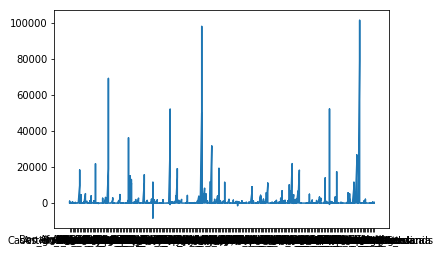

In [34]:
plt.plot(df['countriesAndTerritories'], df['cases']).nlargerst(5)

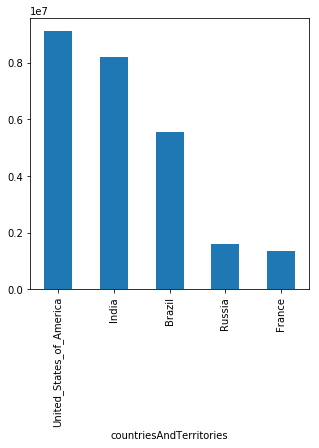

In [44]:
plt.figure(figsize=(5,5))
country_grp = df.groupby(['countriesAndTerritories']).sum()
cases = country_grp['cases'].nlargest(5)
cases.plot.bar()

Text(0.5, 1.0, 'The 5 countries with the highest total deaths')

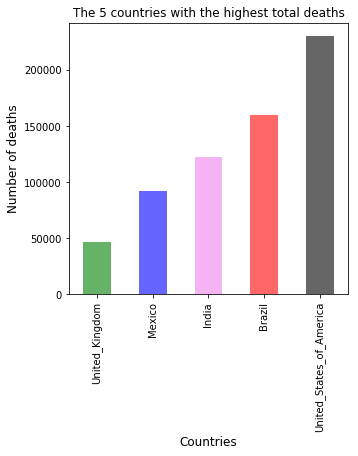

In [168]:
import seaborn as sns
plt.figure(figsize=(5,5))
#plt.gca().invert_yaxis()
country_grp = df.groupby(['countriesAndTerritories']).sum()
deaths = country_grp['deaths'].nlargest(5).sort_values()
deaths.plot.bar( align='center', alpha=0.6, color = ['green','blue','violet', 'red', 'black'])

plt.xticks()
plt.xlabel('Countries', size=12)
plt.ylabel('Number of deaths', size=12)
plt.title("The 5 countries with the highest total deaths", size=12)

In [82]:
country_grp

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
countriesAndTerritories,,,,,,,
Afghanistan,4755,1675,599939,41501,1536,1.129840e+10,1503.090407
Albania,3840,1580,480760,20875,509,6.812576e+08,9271.607625
Algeria,4799,1690,610039,57942,1964,1.300202e+10,1823.410716
Andorra,3773,1565,470660,4756,75,1.774924e+07,74397.784108
Angola,3645,1541,454500,10558,279,7.160692e+09,394.264953
Anguilla,3525,1526,444400,3,0,3.271840e+06,67.240452
Antigua_and_Barbuda,3681,1547,458540,128,3,2.204510e+07,1718.581064
Argentina,3843,1586,484800,1166911,31002,1.074736e+10,33853.306142
Armenia,4775,1678,601959,92254,1363,8.814029e+08,36641.807496


In [169]:
country_grp['countriesAndTerritories'] = country_grp.index
sns.barplot(x=country_grp.nlargest(5, ['deaths']).sort_values(),y="deaths",data=country_grp)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [134]:
deaths

countriesAndTerritories
United_Kingdom               46555
Mexico                       91753
India                       122111
Brazil                      159884
United_States_of_America    230556
Name: deaths, dtype: int64

In [138]:
df_new1 = df.groupby('countriesAndTerritories')['cases'].sum()

In [139]:
df_new2 = df.groupby('countriesAndTerritories')['deaths'].sum()

In [212]:
df_new2.nlargest(5)

countriesAndTerritories
United_States_of_America    230556
Brazil                      159884
India                       122111
Mexico                       91753
United_Kingdom               46555
Name: deaths, dtype: int64

In [182]:
groupedvalues = df.groupby('countriesAndTerritories').sum().reset_index()
global_largest = groupedvalues.nlargest(5, ['deaths']).sort_values('deaths')

Text(0.5, 1.0, 'The 5 countries with the highest total deaths')

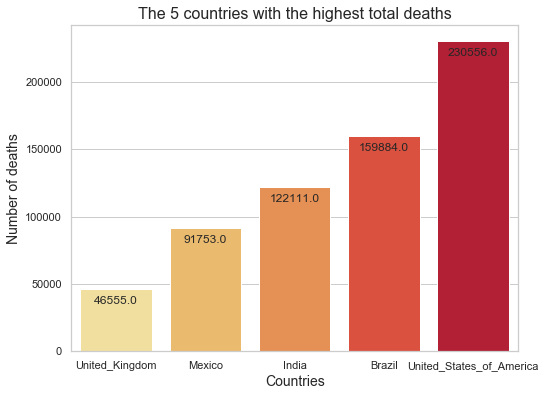

In [349]:
plt.figure(figsize=(8, 6))
global_deaths = sns.barplot(x='countriesAndTerritories',y='deaths',palette='YlOrRd', data=global_largest)
sns.set(style='whitegrid')
for p in global_deaths .patches:
    global_deaths.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
   
plt.xlabel('Countries', size=14)
plt.ylabel('Number of deaths', size=14)

plt.title("The 5 countries with the highest total deaths", size=16)

In [214]:
df5 = groupedvalues.nlargest(5, ['cases']).countriesAndTerritories 	

,countriesAndTerritories,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
203,United_States_of_America,4838,1705,620139,9126361,230556,1.010229e+11,36635.925549
92,India,4829,1702,618119,8184082,122111,4.181238e+11,8068.042040
27,Brazil,4838,1705,620139,5535605,159884,6.479220e+10,35714.485566
160,Russia,4838,1705,620139,1618116,27990,4.478278e+10,14458.797718
70,France,4838,1705,620139,1364625,36788,2.057296e+10,23188.200991


In [215]:
groupedvalues.head(5)

,countriesAndTerritories,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,Afghanistan,4755,1675,599939,41501,1536,1.129840e+10,1503.090407
1,Albania,3840,1580,480760,20875,509,6.812576e+08,9271.607625
2,Algeria,4799,1690,610039,57942,1964,1.300202e+10,1823.410716
3,Andorra,3773,1565,470660,4756,75,1.774924e+07,74397.784108
4,Angola,3645,1541,454500,10558,279,7.160692e+09,394.264953


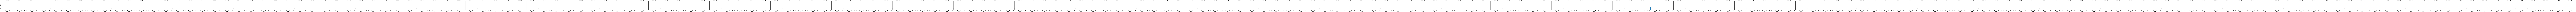

In [222]:
b = sns.FacetGrid(dfpol, col='cases')
b.map(plt.hist, "deaths")

In [367]:
pol = (df['countriesAndTerritories'] == 'Poland')
dfpol = df.loc[pol]
dfpol.drop(['day', 'year', 'countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2019', 'continentExp', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis = 1, inplace=True) 

In [366]:

#plt.figure(figsize=(14,14))

#sns.set(style='darkgrid')
#b = sns.pairplot(dfpol, hue="month", plot_kws = {'alpha': 0.9, 's': 80},          height = 4, )

#plt.suptitle('Charts of ...', size = 18);



In [368]:
    global_largest1 = groupedvalues.nlargest(5, ['cases']).sort_values('cases')

In [369]:
global_largest1

,countriesAndTerritories,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
70,France,4838,1705,620139,1364625,36788,2.057296e+10,23188.200991
160,Russia,4838,1705,620139,1618116,27990,4.478278e+10,14458.797718
27,Brazil,4838,1705,620139,5535605,159884,6.479220e+10,35714.485566
92,India,4829,1702,618119,8184082,122111,4.181238e+11,8068.042040
203,United_States_of_America,4838,1705,620139,9126361,230556,1.010229e+11,36635.925549


In [370]:
global_largest1['countriesAndTerritories']

70                       France
160                      Russia
27                       Brazil
92                        India
203    United_States_of_America
Name: countriesAndTerritories, dtype: object